# Excercise2

In [1]:
def C_to_F(C:int):
    return C*(9/5)+32  # celcius to farenheigh
    

In [2]:
C=20
C_to_F(C)

68.0

# AI for O&g USING PYTHON
## Stereonets
refrence: https://github.com/ICWallis/fractoolbox

In [3]:
# !pip install mplstereonet

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplstereonet as mpls
%matplotlib inline

In [5]:
# define strike and dip of a fault
STRIKE=45
DIP=60

Text(0.5, 1.1, 'my fault: 045/65E')

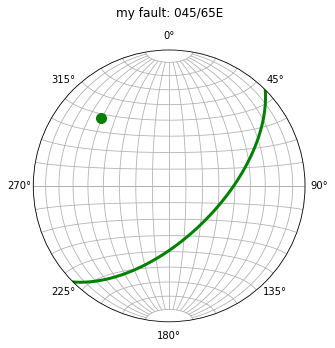

In [6]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_area_stereonet")

# default formatting - ax.plane(strike,dip)
ax.plane(STRIKE, DIP, "-", color="g", linewidth=3)   # plot the circle
ax.pole(STRIKE, DIP, "o", color="g", markersize=10)  # plot the pole
ax.grid()
ax.set_title("my fault: 045/65E", y=1.1)  # y parameter provides a space between the fig and the title

Text(0.5, 1.1, 'my fault equal angle: 045/65E')

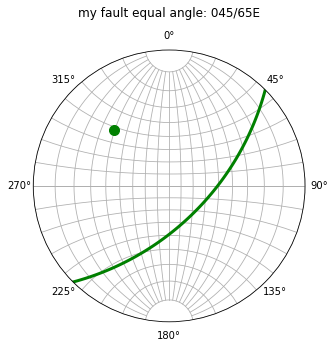

In [7]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_angle_stereonet")

# default formatting - ax.plane(strike,dip)
ax.plane(STRIKE, DIP, "-", color="g", linewidth=3)   # plot the circle
ax.pole(STRIKE, DIP, "o", color="g", markersize=10)  # plot the ple
ax.grid()
ax.set_title("my fault equal angle: 045/65E", y=1.1)  # y parameter provides a sapce between the fig and the title

In [8]:
dipazs=[0,90,180,300]
dips=[5,20,40,60]

df=pd.DataFrame(list(zip(dipazs,dips)), columns=["Azm","dips"])
df

Azm  dips
0    0     5
1   90    20
2  180    40
3  300    60

In [9]:
df.loc[:1,]

Azm  dips
0    0     5
1   90    20

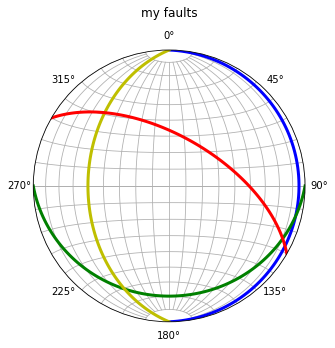

In [10]:
fig = plt.figure(figsize=(14,5))  # container of the figure
ax = fig.add_subplot(projection="equal_area_stereonet")

# default formatting - ax.plane(strike,dip)
ax.grid()
ax.set_title("my faults", y=1.1)  # y parameter provides a sapce between the fig and the title
COLORS = ["b","g","y","r"]
for i in range(df.shape[0]):
    ax.plane(df.loc[i,"Azm"],df.loc[i,"dips"], "-", color=COLORS[i], linewidth=3)
plt.show()

# Decline Curve Analysis(DCA)

* exponential
* harmonic
* hyperbolic

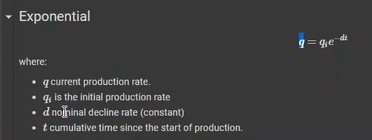
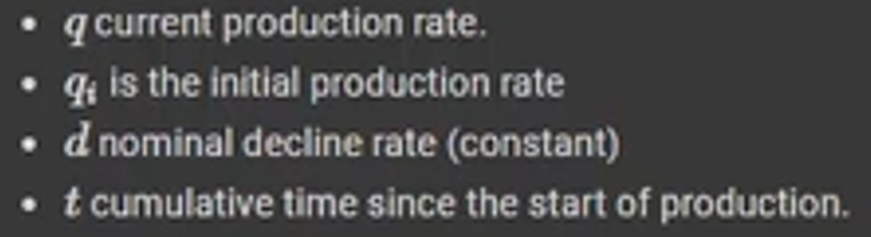

In [11]:
def ExponentialDecline(t, qi,di):
    return qi*np.exp(-di*t)

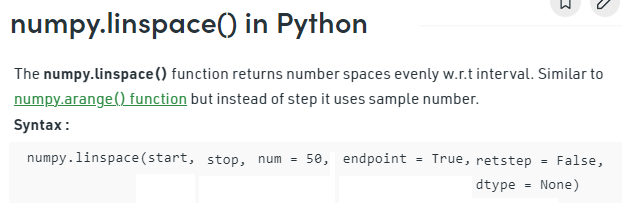

In [12]:
# create tiem series
t = np.linspace(1,365,365)
print(type(t), len(t))

<class 'numpy.ndarray'> 365


In [13]:
qi=250  # starting production
di=0.01 # declination rate

prodExp = ExponentialDecline(t,qi,di)
len(prodExp)

365

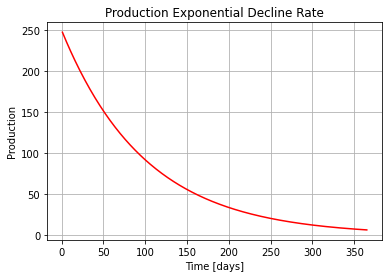

In [14]:
plt.plot(t,prodExp, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Exponential Decline Rate")
plt.grid()

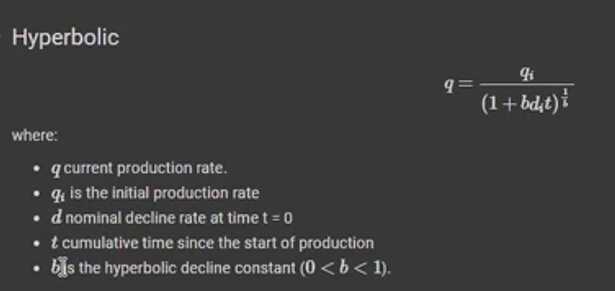

In [15]:
# Hyperbolic Decline production rate
def hyperbolicDecline(t,qi,b,di):
    return qi/((1+b*di*t)**(1/b))

In [16]:
qi=250  # starting production
di=0.01 # declination rate
b=0.5

prodHyp = hyperbolicDecline(t,qi,b,di)
len(prodHyp)

365

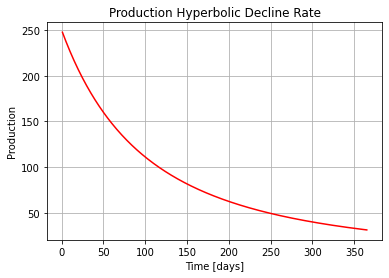

In [17]:
plt.plot(t,prodHyp, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Hyperbolic Decline Rate")
plt.grid()

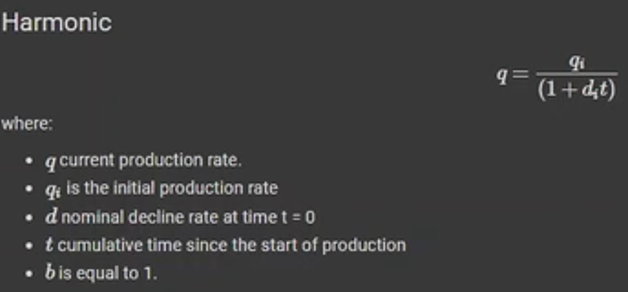

In [18]:
# Harmonic Decline production rate
def harmonicDecline(t,qi,di):
    return qi/((1+di*t))

In [19]:
qi=250  # starting production
di=0.01 # declination rate
b=1

prodHarm = harmonicDecline(t,qi,di)
len(prodHarm)

365

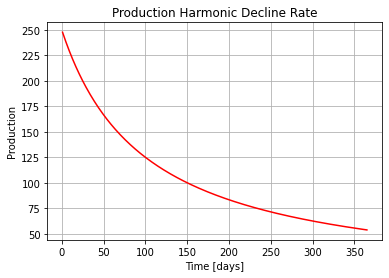

In [20]:
plt.plot(t,prodHarm, c="red")
plt.xlabel("Time [days]")
plt.ylabel("Production")
plt.title("Production Harmonic Decline Rate")
plt.grid()

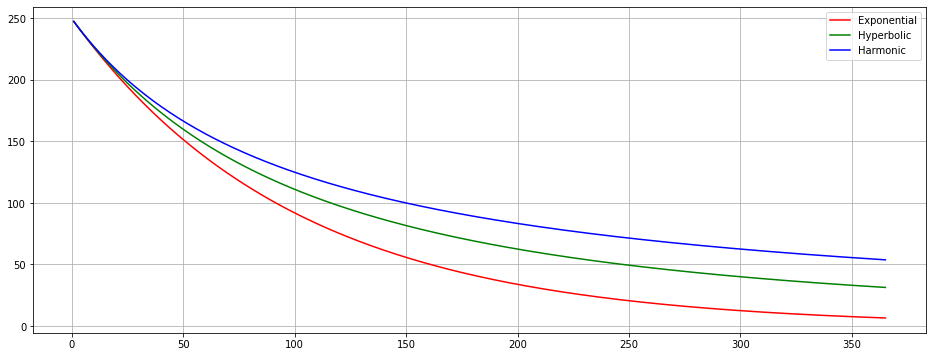

In [21]:
plt.figure(figsize=(16,6))
plt.plot(t,prodExp, c="red", label="Exponential")
plt.plot(t,prodHyp, c="green", label="Hyperbolic")
plt.plot(t,prodHarm, c="blue", label="Harmonic")
plt.legend()
plt.grid()

In [22]:
# create a data range

import datetime as dt
import random

starting_date = dt.datetime.strptime("2016-03-31 00:00:00", "%Y-%m-%d %H:%M:%S")
k=30
dates = pd.date_range(starting_date, periods=k, freq="M")
dates

DatetimeIndex(['2016-03-31', '2016-04-30', '2016-05-31', '2016-06-30',
               '2016-07-31', '2016-08-31', '2016-09-30', '2016-10-31',
               '2016-11-30', '2016-12-31', '2017-01-31', '2017-02-28',
               '2017-03-31', '2017-04-30', '2017-05-31', '2017-06-30',
               '2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28',
               '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30',
               '2018-07-31', '2018-08-31'],
              dtype='datetime64[ns]', freq='M')

In [23]:
well_rate = [248,434,383,400,322,225,208,168,145,150,133,112,114,103,137,204,186,153,156,145,142,144,130,118,129,119,120,115,110,110]
len(well_rate)

30

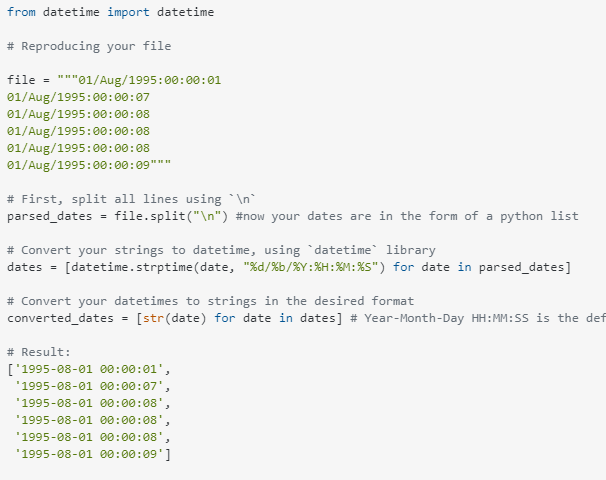

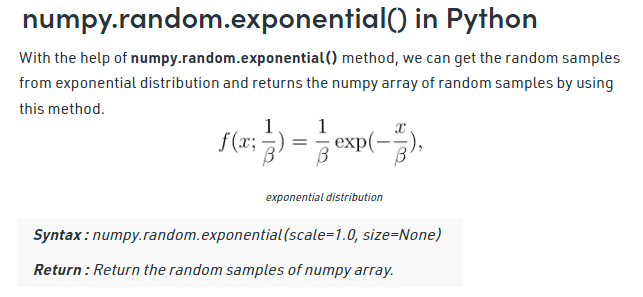

In [24]:
min_time = min(dates)
print(type(min_time))
time =  [(x-min_time).days for x in dates]  # extract the day values for the diff
print(len(time))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
30


In [25]:
t = np.linspace(0,max(time),len(time))
t

array([  0.        ,  30.44827586,  60.89655172,  91.34482759,
       121.79310345, 152.24137931, 182.68965517, 213.13793103,
       243.5862069 , 274.03448276, 304.48275862, 334.93103448,
       365.37931034, 395.82758621, 426.27586207, 456.72413793,
       487.17241379, 517.62068966, 548.06896552, 578.51724138,
       608.96551724, 639.4137931 , 669.86206897, 700.31034483,
       730.75862069, 761.20689655, 791.65517241, 822.10344828,
       852.55172414, 883.        ])

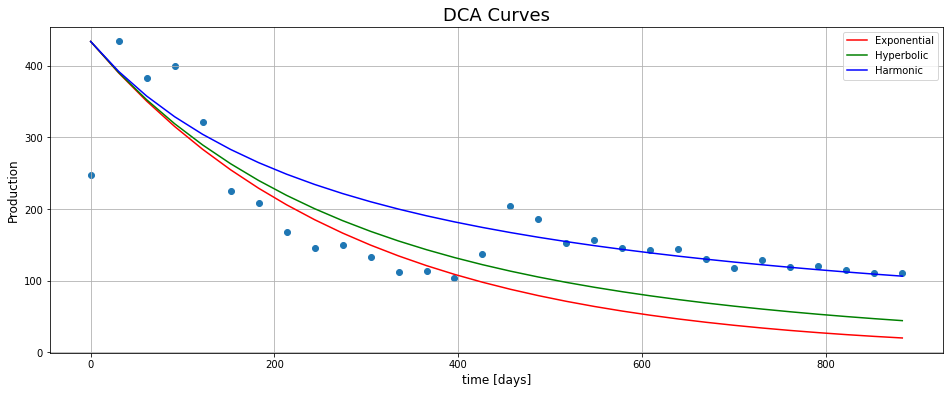

In [26]:
qi=max(well_rate)  # starting production
di=0.0035 # declination rate
b=0.25

prodExp = ExponentialDecline(t,qi,di)
prodHyp = hyperbolicDecline(t,qi,b,di)
prodHarm = harmonicDecline(t,qi,di)


plt.figure(figsize=(16,6))
plt.scatter(t,well_rate)
plt.plot(t,prodExp, c="red", label="Exponential")
plt.plot(t,prodHyp, c="green", label="Hyperbolic")
plt.plot(t,prodHarm, c="blue", label="Harmonic")
plt.xlabel("time [days]", fontsize=12)
plt.ylabel("Production", fontsize=12)
plt.title("DCA Curves", fontsize=18)
plt.legend()
plt.grid()

# SCIPY

# EXCERCISE 2

In [27]:
file_path = "D:\\lh_data\\geophysics\\F02-1_logs.las"
file_path

'D:\\lh_data\\geophysics\\F02-1_logs.las'

In [29]:
# loading LAS as numpy array
data = np.loadtxt(file_path, skiprows=35)
data

array([[ 4.80000000e+01, -9.99250000e+02,  5.24048500e+02, ...,
         3.82025700e+06, -4.55695600e+02, -9.99250000e+02],
       [ 4.81500000e+01, -9.99250000e+02,  5.24041000e+02, ...,
         3.82031175e+06, -4.55695600e+02, -9.99250000e+02],
       [ 4.83000000e+01, -9.99250000e+02,  5.24033600e+02, ...,
         3.82036625e+06, -4.55695600e+02, -9.99250000e+02],
       ...,
       [ 1.49955000e+03,  1.86164970e+03,  5.37190200e+02, ...,
         3.46552400e+06, -2.39115938e+05, -9.99250000e+02],
       [ 1.49970010e+03,  1.88039780e+03,  5.37263000e+02, ...,
         3.49995775e+06, -2.39115938e+05, -9.99250000e+02],
       [ 1.49985010e+03,  1.85633500e+03,  5.37383100e+02, ...,
         3.45440400e+06, -2.12640703e+05, -9.99250000e+02]])

In [30]:
data.shape

(9680, 7)

In [36]:
df


Azm  dips
0    0     5
1   90    20
2  180    40
3  300    60

In [31]:
data[data==-999.25]=np.nan  # assigns a value to every NULL VALUE

In [37]:
df

Azm  dips
0    0     5
1   90    20
2  180    40
3  300    60

In [38]:
columns = ["DEPTH", "RHOB", "DT", "GR", "AI", "AI_rel", "PHIE" ]
df =pd.DataFrame(data,columns=columns)
df

DEPTH       RHOB        DT       GR          AI       AI_rel  PHIE
0       48.0000        NaN  524.0485      NaN  3820257.00    -455.6956   NaN
1       48.1500        NaN  524.0410      NaN  3820311.75    -455.6956   NaN
2       48.3000        NaN  524.0336      NaN  3820366.25    -455.6956   NaN
3       48.4500        NaN  524.0262      NaN  3820419.75    -455.6956   NaN
4       48.6000        NaN  524.0190      NaN  3820472.25    -455.6956   NaN
...         ...        ...       ...      ...         ...          ...   ...
9675  1499.2500  1787.5444  532.1727  27.6273  3359011.00 -239115.9375   NaN
9676  1499.4000  1814.1691  534.8610  28.5281  3391772.00 -239115.9375   NaN
9677  1499.5500  1861.6497  537.1902  28.5813  3465524.00 -239115.9375   NaN
9678  1499.7001  1880.3978  537.2630  28.5813  3499957.75 -239115.9375   NaN
9679  1499.8501  1856.3350  537.3831  27.9759  3454404.00 -212640.7031   NaN

[9680 rows x 7 columns]

Text(0.5, 1.0, 'GR & DEPTH')

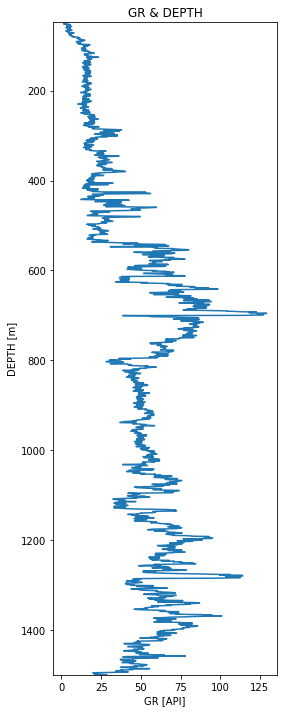

In [39]:
plt.figure(figsize=(4,12))
plt.plot(df.GR, df.DEPTH)
plt.ylim(max(df.DEPTH), min(df.DEPTH))  # changing the orientation of the y axis
plt.xlabel("GR [API]")
plt.ylabel("DEPTH [m]")
plt.title("GR & DEPTH")

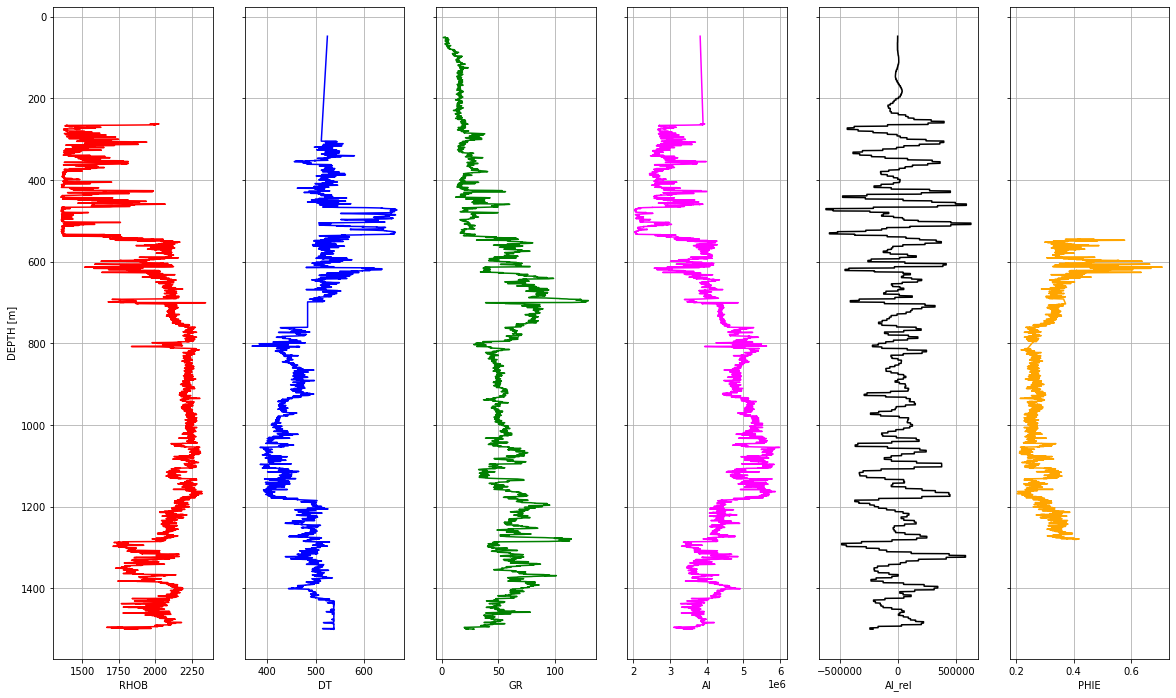

In [40]:
# SUBPLOTS

fig, ax = plt.subplots(1,6, figsize=(20,12), sharey=True)  # all the axis share the same y scale/orientation
ax[0].plot(df.RHOB, df.DEPTH, color="r")
ax[0].invert_yaxis()                                       # yaxis inverted
ax[0].set_xlabel("RHOB")
ax[0].set_ylabel("DEPTH [m]")
ax[1].plot(df.DT, df.DEPTH, color="b")
ax[1].set_xlabel("DT")
ax[2].plot(df.GR, df.DEPTH, color="g")
ax[2].set_xlabel("GR")
ax[3].plot(df.AI, df.DEPTH, color="magenta")
ax[3].set_xlabel("AI")
ax[4].plot(df.AI_rel, df.DEPTH, color="black")
ax[4].set_xlabel("AI_rel")
ax[5].plot(df.PHIE, df.DEPTH, color="orange")
ax[5].set_xlabel("PHIE")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()


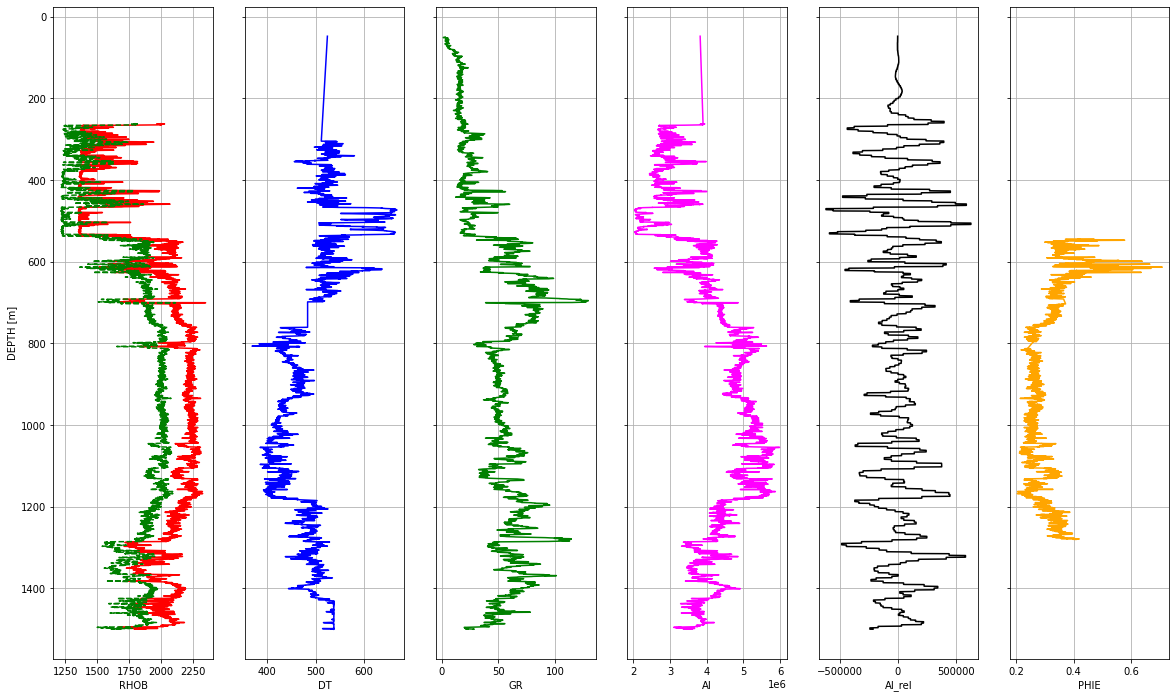

In [202]:
fig, ax = plt.subplots(1,6, figsize=(20,12), sharey=True)  # all the axis share the same y scale/orientation
ax[0].plot(df.RHOB, df.DEPTH, color="r")
ax[0].plot(df.RHOB*0.9, df.DEPTH, color="g", linestyle="--")  # two values in the same plot
ax[0].invert_yaxis()                                       # yaxis inverted
ax[0].set_xlabel("RHOB")
ax[0].set_ylabel("DEPTH [m]")
ax[1].plot(df.DT, df.DEPTH, color="b")
ax[1].set_xlabel("DT")
ax[2].plot(df.GR, df.DEPTH, color="g")
ax[2].set_xlabel("GR")
ax[3].plot(df.AI, df.DEPTH, color="magenta")
ax[3].set_xlabel("AI")
ax[4].plot(df.AI_rel, df.DEPTH, color="black")
ax[4].set_xlabel("AI_rel")
ax[5].plot(df.PHIE, df.DEPTH, color="orange")
ax[5].set_xlabel("PHIE")
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()


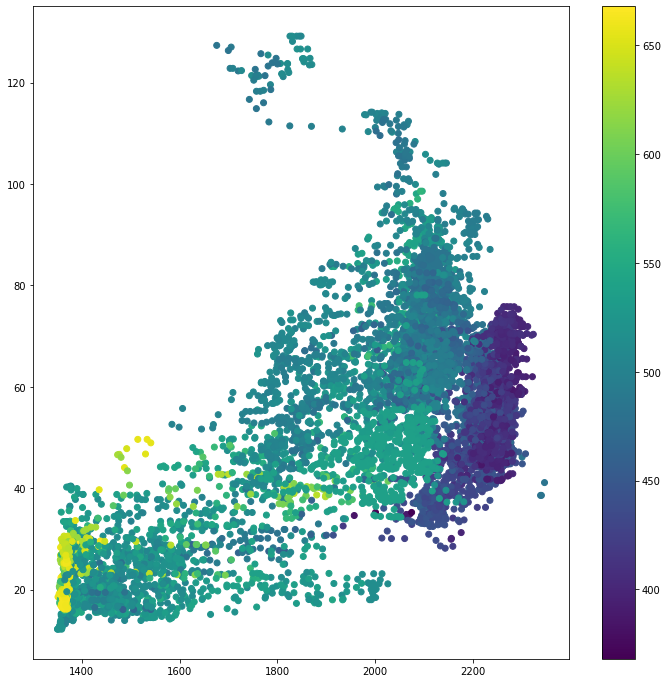

In [41]:
plt.figure(figsize=(12,12))
plt.scatter(df.RHOB,df.GR,c=df.DT)
plt.colorbar()

# SEISMIC

In [42]:
! pip install segyio

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [43]:
import segyio

In [44]:
file_path = "D:\\lh_data\\geophysics\\Penobscot_0-1000ms.sgy"
file_path

'D:\\lh_data\\geophysics\\Penobscot_0-1000ms.sgy'

In [45]:
with segyio.open(file_path) as f:
    data = segyio.cube(f)
print(type(data), data.shape, data.ndim)

<class 'numpy.ndarray'> (601, 481, 251) 3


In [46]:
print("INLINES:", data.shape[0])
print("XLINES:", data.shape[1])
print("SLICES:", data.shape[2])

INLINES: 601
XLINES: 481
SLICES: 251


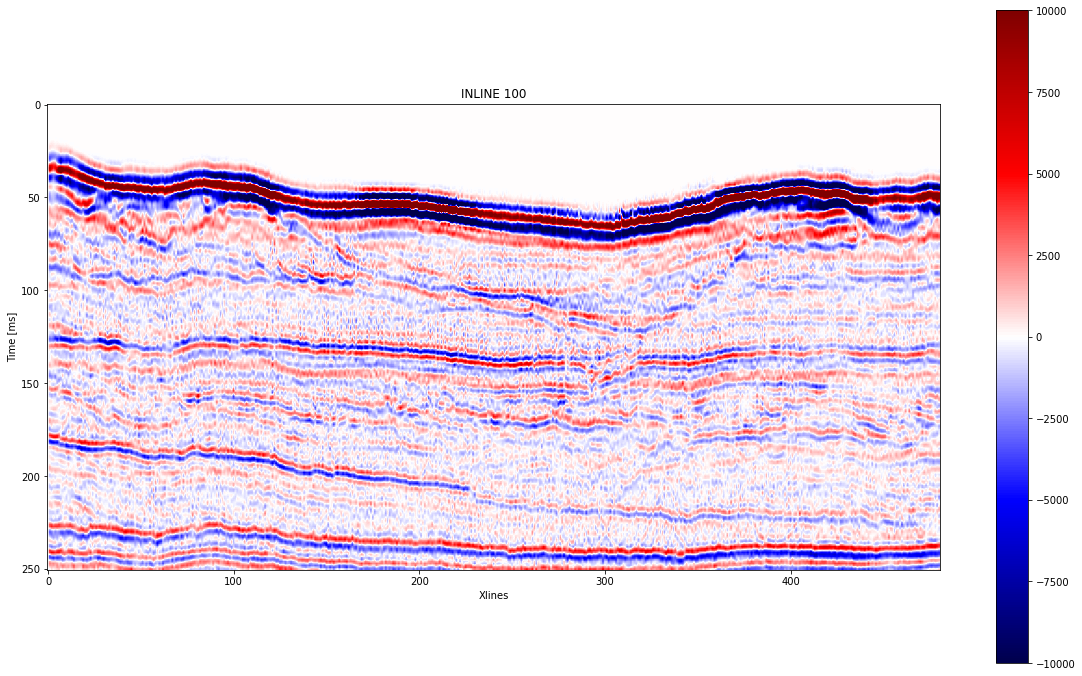

In [47]:
INLINE=100

plt.figure(figsize=(20,12)) 
plt.imshow(data[INLINE, :, :].T, cmap="seismic", vmax=10000, vmin=-10000)  # vmin, vmax allows changing the intensity of the image
plt.ylabel("Time [ms]")
plt.xlabel("Xlines")
plt.title(f"INLINE {INLINE}")

plt.colorbar()

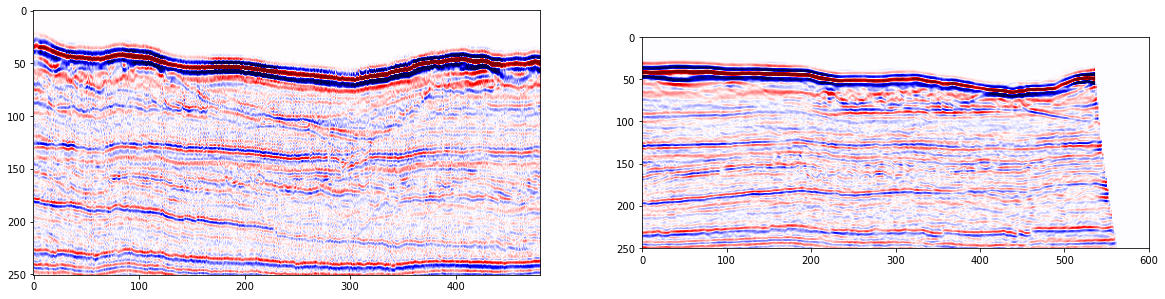

In [48]:
INLINE=100
XLINE=100
SLICE=100


plt.figure(figsize=(20,20)) 
# inlines
plt.subplot(1,2,1)
plt.imshow(data[INLINE, :, :].T, cmap="seismic", vmax=10000, vmin=-10000)
# xlines
plt.subplot(1,2,2)
plt.imshow(data[:, XLINE, :].T, cmap="seismic", vmax=10000, vmin=-10000)


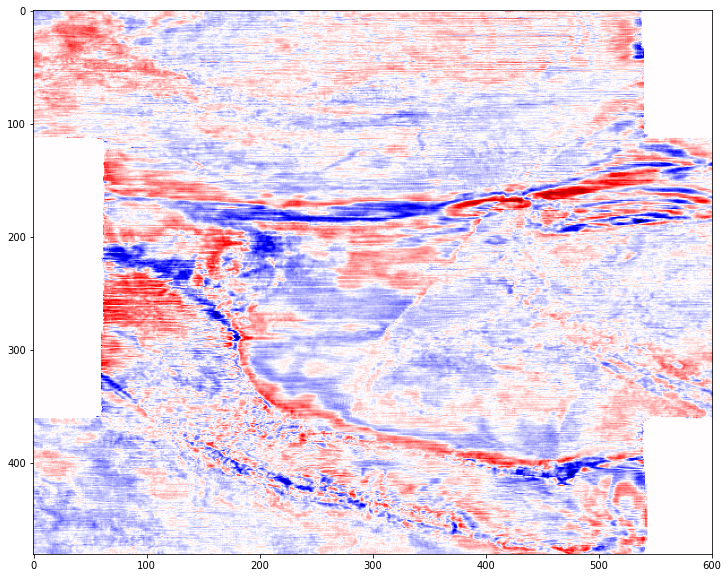

In [49]:
plt.figure(figsize=(15,10)) 
# slices
plt.imshow(data[:, :, SLICE].T, cmap="seismic", vmax=10000, vmin=-10000)

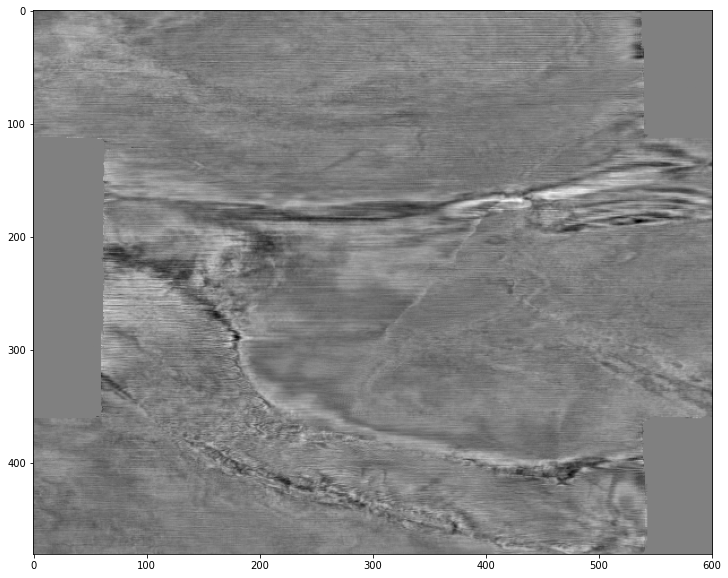

In [50]:
plt.figure(figsize=(15,10)) 
# slices
plt.imshow(data[:, :, SLICE].T, cmap="gray", vmax=10000, vmin=-10000)

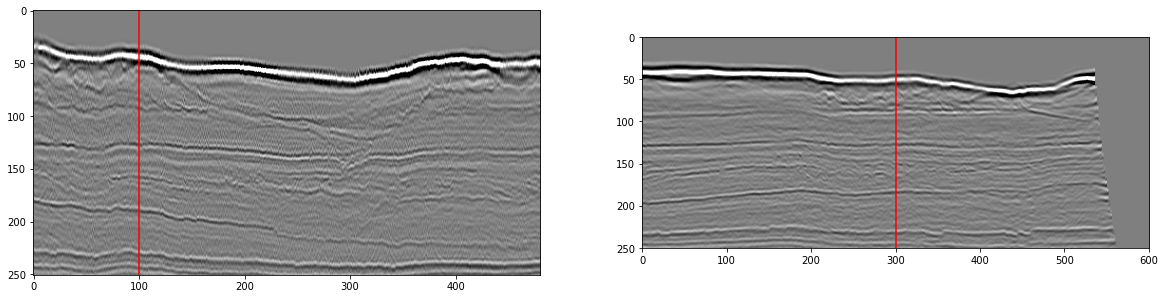

In [51]:
INLINE=100
XLINE=100
SLICE=100


plt.figure(figsize=(20,20)) 

# inlines
plt.subplot(1,2,1)
plt.axvline(x=100, c="r")
plt.imshow(data[INLINE, :, :].T, cmap="gray", vmax=10000, vmin=-10000)
# xlines
plt.subplot(1,2,2)
plt.axvline(x=300, c="r")
plt.imshow(data[:, XLINE, :].T, cmap="gray", vmax=10000, vmin=-10000)

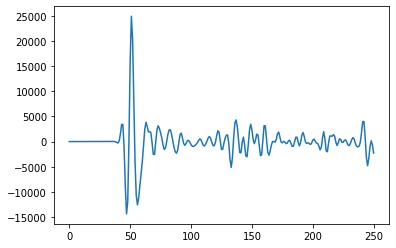

In [57]:
# Estract a trace
trace = data[350,350,:]
plt.plot(trace)
             

In [58]:
len(trace)

251

In [60]:
trace

array([ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        0.0000e+00,  0.0000e+00,  2.1000e+01, -3.3000e+01, -2.0100e+02,
       -2.9100e+02,  1.5900e+02,  1.5450e+03,  3.4480e+03,  3.3610e+03,
       -1.1110e+03, -8.8390e+03, -1.4400e+04, -1.1977e+04,  1.1900e+02,
        1.5939e+04,  2.4942e+04,  2.0327e+04,  7.6420e+03, -4.0190e+03,
       -1.0718e+04, -1.2608e+04, -1.1168e+04, -8.6820e+03, -6.3420e+03,
       -3.9110e+03, -7.0900e+02,  2.4570e+03,  3.8430e+03,  3.0220e+03,
        1.9130e+03,  1.9830e+03,  1.7510e+03, -2.5000e+02, -2.53

Text(0, 0.5, 'time [ms]')

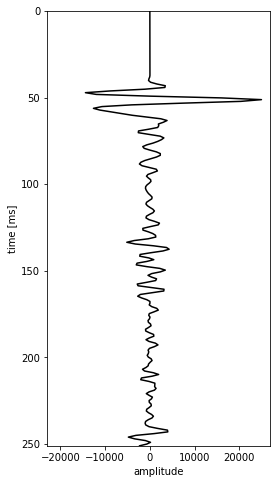

In [68]:
plt.figure(figsize=(4,8))
time = np.linspace(0,251,251)
plt.plot(trace,time, color="black")
plt.ylim(251,0)
plt.xlim(-max(trace)+2000,max(trace)+2000)
plt.xlabel("amplitude")
plt.ylabel("time [ms]")

In [110]:
# calculates only the abs vaue of fft
freq_trace = np.fft.fftfreq(len(trace))
mask_trace=freq>0
fft_trace=abs(np.fft.fft(trace))


In [111]:
max(fft_trace[mask_trace])

173135.81328794203

array([ 0.        ,  0.00398406,  0.00796813,  0.01195219,  0.01593625,
        0.01992032,  0.02390438,  0.02788845,  0.03187251,  0.03585657,
        0.03984064,  0.0438247 ,  0.04780876,  0.05179283,  0.05577689,
        0.05976096,  0.06374502,  0.06772908,  0.07171315,  0.07569721,
        0.07968127,  0.08366534,  0.0876494 ,  0.09163347,  0.09561753,
        0.09960159,  0.10358566,  0.10756972,  0.11155378,  0.11553785,
        0.11952191,  0.12350598,  0.12749004,  0.1314741 ,  0.13545817,
        0.13944223,  0.14342629,  0.14741036,  0.15139442,  0.15537849,
        0.15936255,  0.16334661,  0.16733068,  0.17131474,  0.1752988 ,
        0.17928287,  0.18326693,  0.187251  ,  0.19123506,  0.19521912,
        0.19920319,  0.20318725,  0.20717131,  0.21115538,  0.21513944,
        0.21912351,  0.22310757,  0.22709163,  0.2310757 ,  0.23505976,
        0.23904382,  0.24302789,  0.24701195,  0.25099602,  0.25498008,
        0.25896414,  0.26294821,  0.26693227,  0.27091633,  0.27

(0.0, 250.0)

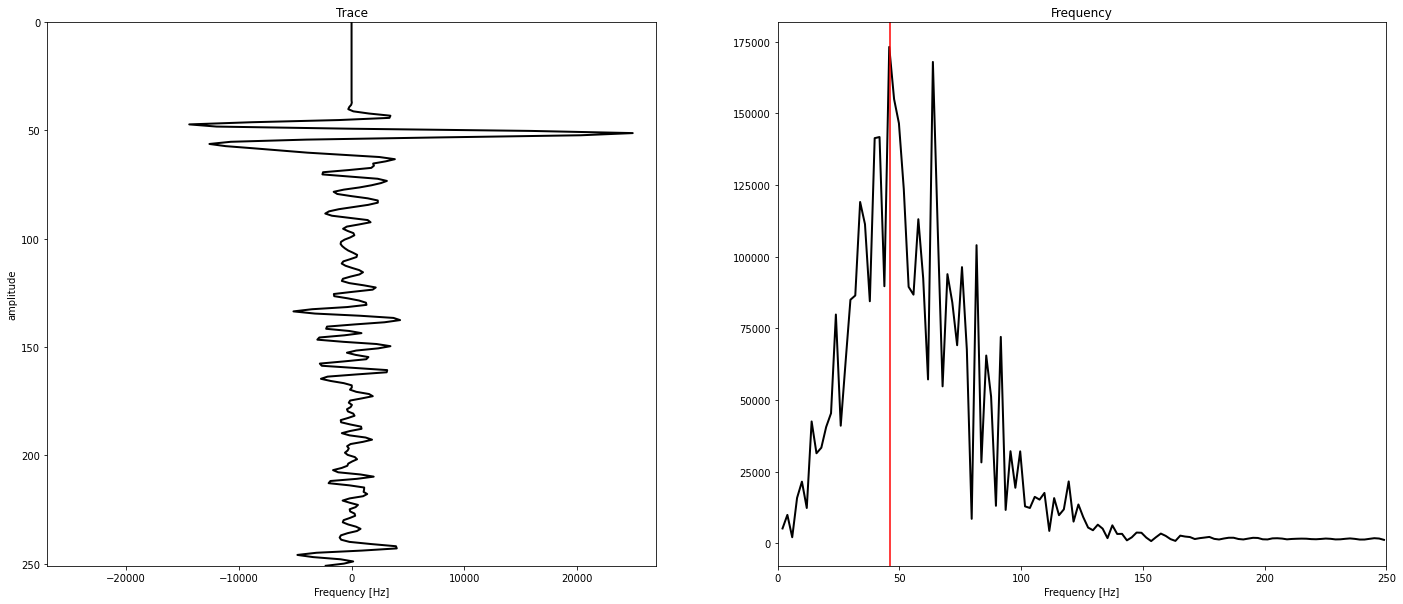

In [115]:
fig,ax=plt.subplots(1,2,figsize=(24,10))

ax[0].plot(trace, time, lw=2, color="black")
ax[0].title.set_text("Trace")
ax[0].set_ylabel("amplitude")
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylim(251,0)
ax[0].set_xlim(-27000.0,27000.0)

ax[1].plot(freq_trace[mask_trace]*500, fft_trace[mask_trace], lw=2, color="black")
ax[1].title.set_text("Frequency")
ax[1].set_xlabel("Frequency [Hz]")
ax[1].axvline(x=46, c="red")
ax[1].set_xlim(0.0,250.0)


# SEISMIC WAVELET

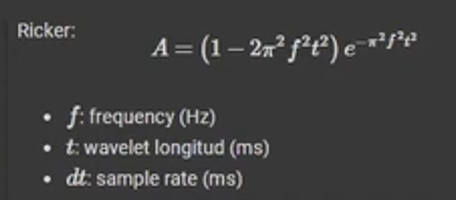

In [52]:
FREQ=25   # Hz
TN=0.5    # time longiture
DT=0.002  # sample rate


In [53]:
# Generate a time series  (min, max, step)
t=np.arange(-TN/2,TN/2,DT)
len(t)

250

In [54]:
# define the wavelet
ricker = (1-2*np.pi**2*FREQ**2*t**2)*(np.exp(-np.pi**2*FREQ**2*t**2))
len(ricker)

250

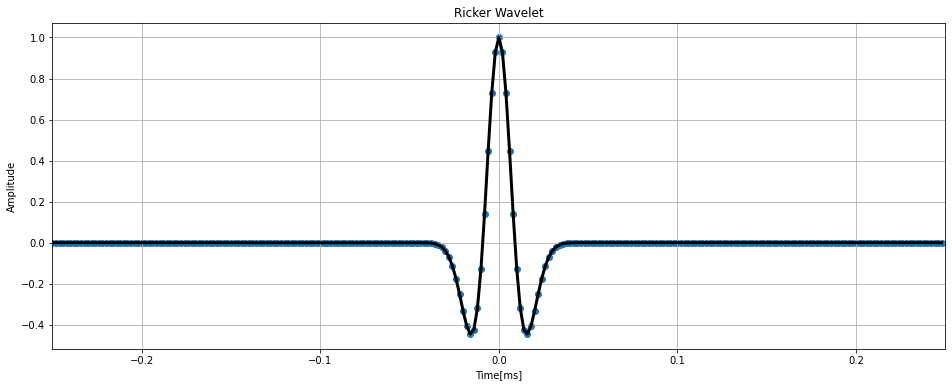

In [55]:
plt.figure(figsize=(16,6))
plt.plot(t,ricker, linewidth=3, c="black")
plt.scatter(t,ricker)
plt.title("Ricker Wavelet")
plt.ylabel("Amplitude")
plt.xlabel("Time[ms]")
plt.xlim(-0.25,0.25)
plt.grid()

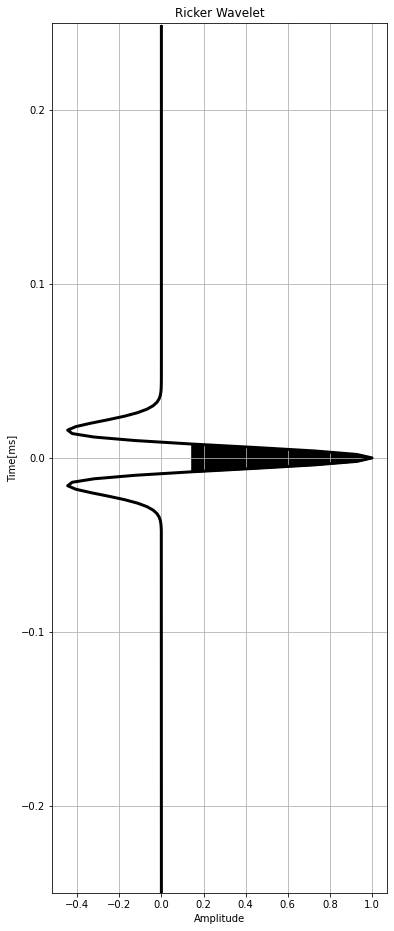

In [56]:
plt.figure(figsize=(6,16))
plt.plot(ricker, t, linewidth=3, c="black")
plt.fill_between(ricker,t,0,ricker>=0.0,color="black")
#plt.scatter(ricker,t)
plt.title("Ricker Wavelet")
plt.xlabel("Amplitude")
plt.ylabel("Time[ms]")
plt.ylim(-0.25,0.25)
plt.grid()

# SIGNAL ANALYSIS

In [72]:
N=1000
TX=200
W=2.0*np.pi/TX

t = np.linspace(0,TX,N)
s1=2.0*np.cos(2.0*W*t)
s2=1.0*np.cos(30*W*t)

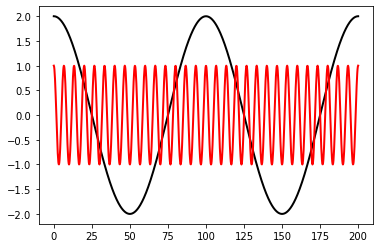

In [73]:
plt.plot(t,s1,lw=2,color="black")
plt.plot(t,s2,lw=2,color="r")

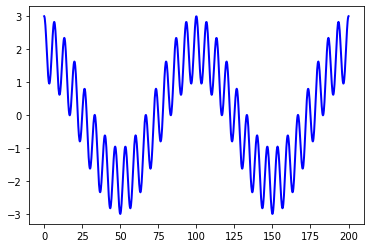

In [74]:
s = s1+s2
plt.plot(t,s,lw=2,color="b")

In [96]:
# calculates only the abs vaue of fft
freq = np.fft.fftfreq(N)*1000
mask=freq>0
fft_s1=2*abs(np.fft.fft(s1)/N)
fft_s2=2*abs(np.fft.fft(s2)/N)
fft_s=2*abs(np.fft.fft(s)/N)

(0.0, 50.0)

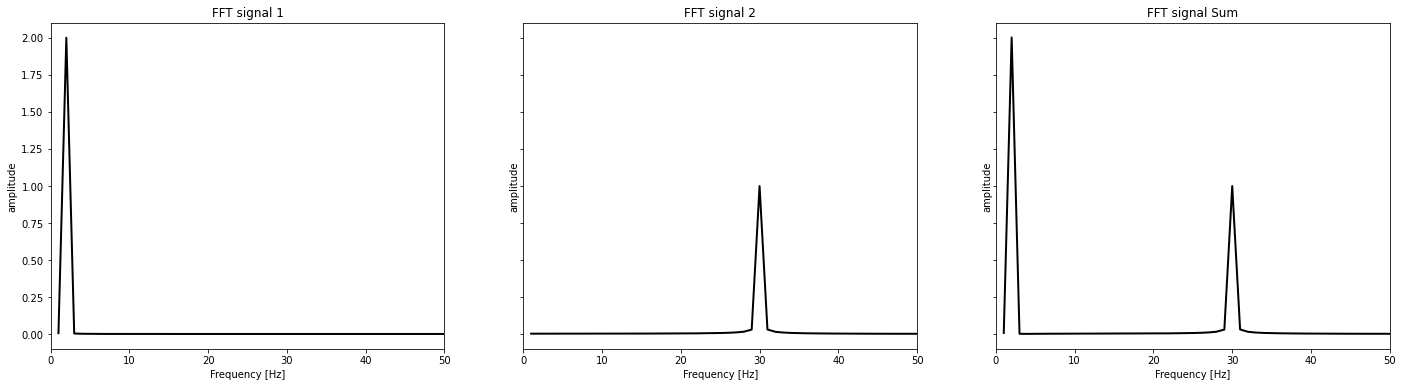

In [99]:
fig,ax=plt.subplots(1,3,figsize=(24,6), sharey=True)
ax[0].plot(freq[mask], fft_s1[mask], lw=2, color="black")
ax[0].title.set_text("FFT signal 1")
ax[0].set_ylabel("amplitude")
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_xlim(0.0,50.0)
ax[1].plot(freq[mask], fft_s2[mask], lw=2, color="black")
ax[1].title.set_text("FFT signal 2")
ax[1].set_ylabel("amplitude")
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_xlim(0.0,50.0)
ax[2].plot(freq[mask], fft_s[mask], lw=2, color="black")
ax[2].title.set_text("FFT signal Sum")
ax[2].set_ylabel("amplitude")
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_xlim(0.0,50.0)

# wedge model

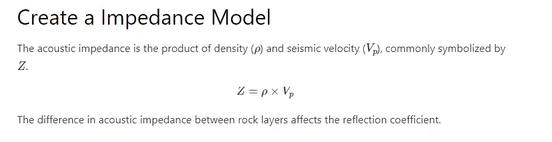

In [116]:
from scipy.signal import convolve
import copy

In [117]:
# layer 1
layer1_vp = 2950
layer1_ro=2.65
impedance_layer1 = layer1_vp * layer1_ro

# layer 2
layer2_vp = 3100
layer2_ro=2.7
impedance_layer2 = layer2_vp * layer2_ro

# layer 3
layer3_vp = 2950
layer3_ro=2.65
impedance_layer3 = layer3_vp * layer3_ro

In [118]:
reflectivity_layer_1_2 = (impedance_layer1-impedance_layer2)/(impedance_layer1+impedance_layer2)
print(f" impedance layers 1&2",reflectivity_layer_1_2)
reflectivity_layer_2_3 = (impedance_layer2-impedance_layer3)/(impedance_layer2+impedance_layer3)
print(f" impedance layers 2&3",reflectivity_layer_2_3)

 impedance layers 1&2 -0.034131274131274134
 impedance layers 2&3 0.034131274131274134


In [137]:
# build impedance model array using the np.tri() functions

n_samples = 150  #rows int the model (vertical)
n_traces =50 # model colums or traces (horizontal)

impedance = 1+np.tri(n_samples, n_traces, -n_samples//3, dtype=int)
print(impedance)
impedance[:n_samples//3,:] = 0
print(impedance)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


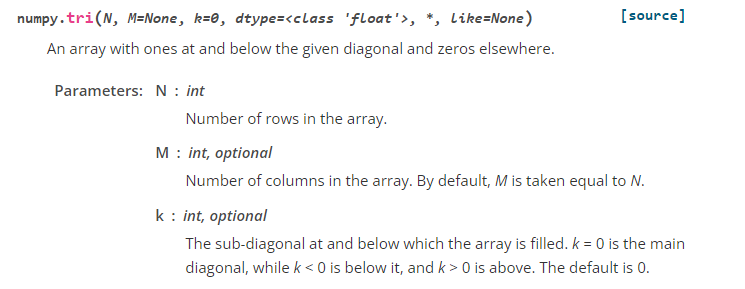

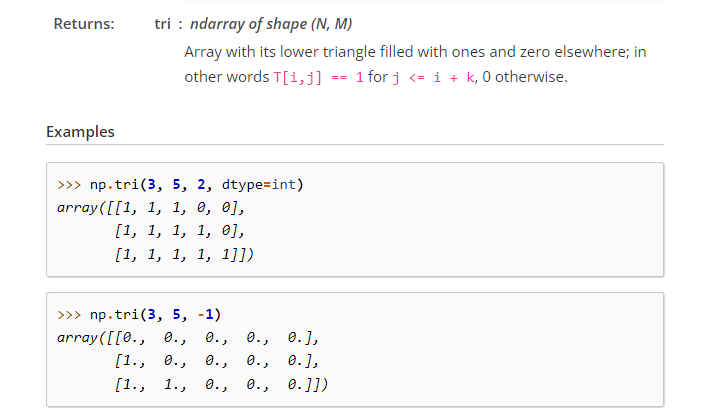


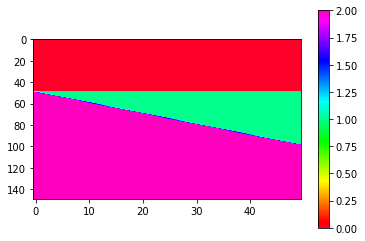

In [121]:
plt.imshow(impedance, aspect=0.2, cmap="gist_rainbow")
plt.colorbar()

In [126]:
# wavelet
FREQ=25   # Hz
TN=250    # time longiture [s]
DT=200  # sample rate [ms]

# Generate a time series  (min, max, step)
t=np.linspace(-TN/2,TN/2,DT)/1000
len(t)

# define the wavelet
ricker = (1-2*np.pi**2*FREQ**2*t**2)*(np.exp(-np.pi**2*FREQ**2*t**2))
len(ricker)

200

In [166]:
reflc=[]
traces=[]

for i in range(n_traces):
    R=np.zeros(n_samples)
    R[50]=reflectivity_layer_1_2
    R[52+i]=reflectivity_layer_2_3
    trace=convolve(R,ricker,mode="same")
    traces.append(trace)
    reflc.append(R)
    
traces=np.asarray(traces).T
reflc=np.asarray(reflc).T

Text(0, 0.5, 'Time(s)')

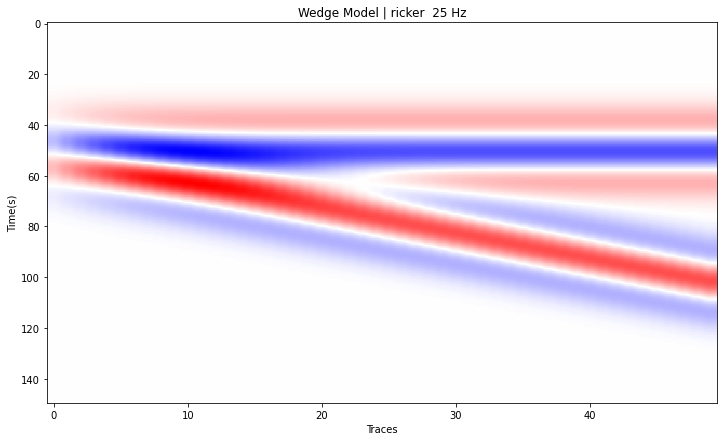

In [167]:
plt.figure(figsize=(12,7))
plt.imshow(traces, aspect="auto", cmap="bwr")
plt.title(f"Wedge Model | ricker  {FREQ} Hz")
plt.xlabel("Traces")
plt.ylabel("Time(s)")

Text(35, 120, 'Layer 3')

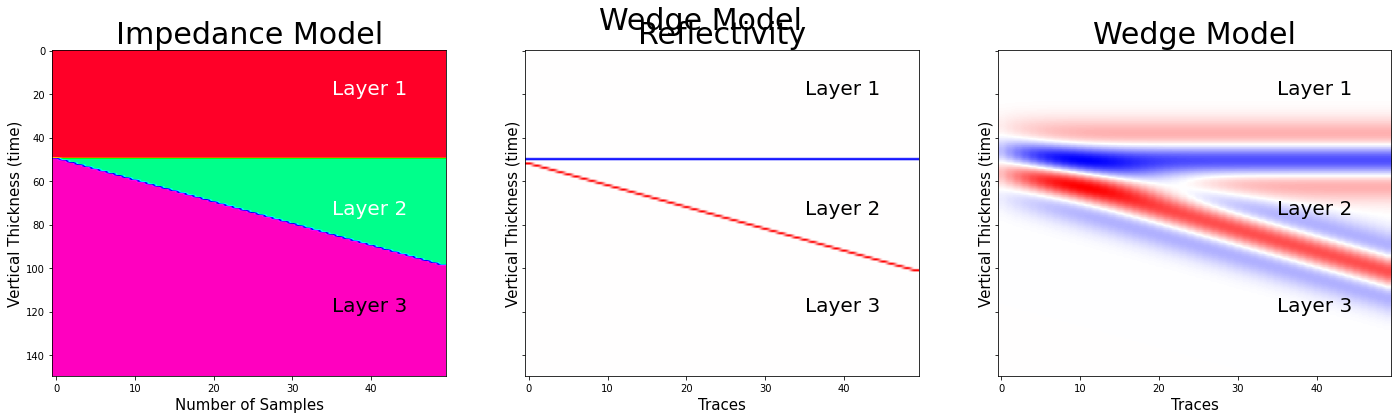

In [183]:
fig,ax=plt.subplots(1,3,figsize=(24,6), sharey=True)
plt.suptitle("Wedge Model",fontsize=30)

ax[0].imshow(impedance, aspect="auto", cmap="gist_rainbow")
ax[0].set_title("Impedance Model",fontsize=30)
ax[0].set_ylabel("Vertical Thickness (time)", fontsize=15)
ax[0].set_xlabel("Number of Samples",fontsize=15)
ax[0].text(35,20,"Layer 1", fontsize=20, color="white")
ax[0].text(35,75,"Layer 2", fontsize=20, color="white")
ax[0].text(35,120,"Layer 3", fontsize=20, color="black")

ax[1].imshow(reflc, aspect="auto",cmap="bwr")
ax[1].set_title("Reflectivity",fontsize=30)
ax[1].set_ylabel("Vertical Thickness (time)", fontsize=15)
ax[1].set_xlabel("Traces",fontsize=15)
ax[1].text(35,20,"Layer 1", fontsize=20, color="black")
ax[1].text(35,75,"Layer 2", fontsize=20, color="black")
ax[1].text(35,120,"Layer 3", fontsize=20, color="black")

ax[2].imshow(traces, aspect="auto", cmap="bwr")
ax[2].set_title("Wedge Model",fontsize=30)
ax[2].set_ylabel("Vertical Thickness (time)", fontsize=15)
ax[2].set_xlabel("Traces",fontsize=15)
ax[2].text(35,20,"Layer 1", fontsize=20, color="black")
ax[2].text(35,75,"Layer 2", fontsize=20, color="black")
ax[2].text(35,120,"Layer 3", fontsize=20, color="black")

In [175]:
traces

array([[ 2.34082331e-11,  2.59220461e-11,  2.68637956e-11, ...,
         2.74001478e-11,  2.74001482e-11,  2.74001488e-11],
       [ 5.90686447e-11,  6.56417121e-11,  6.81555234e-11, ...,
         6.96336292e-11,  6.96336268e-11,  6.96336307e-11],
       [ 1.46000766e-10,  1.62835933e-10,  1.69408998e-10, ...,
         1.73400913e-10,  1.73400917e-10,  1.73400916e-10],
       ...,
       [-4.62592927e-19, -3.08395285e-19, -6.16790569e-19, ...,
        -4.23090462e-10, -1.01145514e-09, -2.36903973e-09],
       [-3.08395285e-19, -1.85037171e-18, -2.62135992e-18, ...,
        -1.73400916e-10, -4.23090465e-10, -1.01145515e-09],
       [ 3.93203988e-18,  2.08166817e-18,  6.16790569e-19, ...,
        -6.96336231e-11, -1.73400914e-10, -4.23090461e-10]])

In [178]:
# extract a trace
single_trace = traces[:,0]
single_trace

array([ 2.34082331e-11,  5.90686447e-11,  1.46000766e-10,  3.53456836e-10,
        8.38054231e-10,  1.94594927e-09,  4.42467384e-09,  9.85111420e-09,
        2.14735940e-08,  4.58244191e-08,  9.57228864e-08,  1.95708925e-07,
        3.91585030e-07,  7.66657113e-07,  1.46848194e-06,  2.75140072e-06,
        5.04166420e-06,  9.03308488e-06,  1.58210828e-05,  2.70804949e-05,
        4.52859585e-05,  7.39612328e-05,  1.17923951e-04,  1.83464604e-04,
        2.78364916e-04,  4.11626662e-04,  5.92757331e-04,  8.30458477e-04,
        1.13060367e-03,  1.49349221e-03,  1.91053149e-03,  2.36072942e-03,
        2.80763960e-03,  3.19764150e-03,  3.46057605e-03,  3.51370489e-03,
        3.26964208e-03,  2.64828655e-03,  1.59190203e-03,  8.14786051e-05,
       -1.84841384e-03, -4.09963499e-03, -6.50864650e-03, -8.85530567e-03,
       -1.08831106e-02, -1.23295285e-02, -1.29626869e-02, -1.26187544e-02,
       -1.12333213e-02, -8.86040619e-03, -5.67446131e-03, -1.95366770e-03,
        1.95366770e-03,  

In [180]:
y_trace = np.linspace(0, len(single_trace)-1, len(single_trace))
len(y_trace)
                      

150

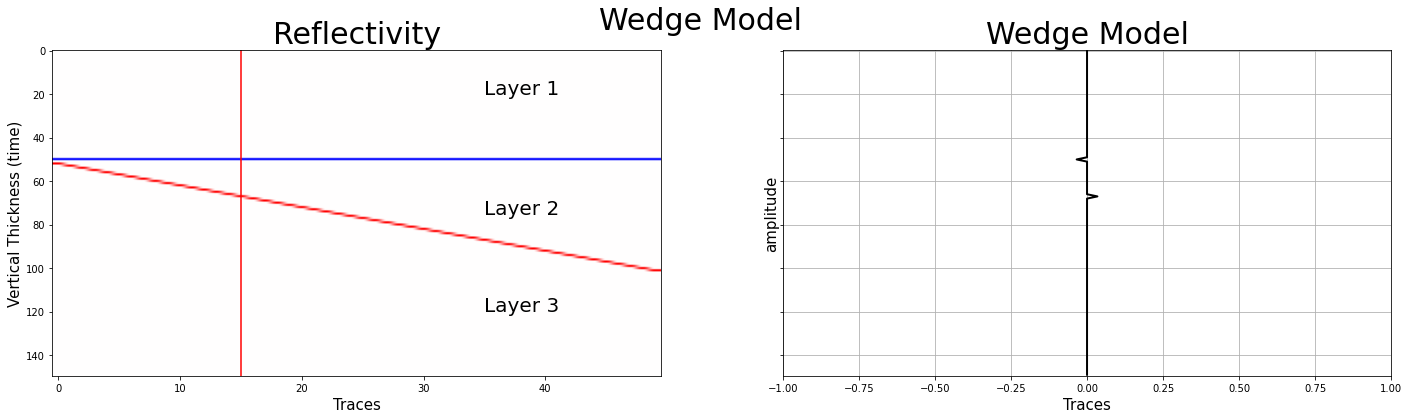

In [198]:
# extract a trace

trace_number=15
single_trace = reflc[:,trace_number]
y_trace = np.linspace(0, len(single_trace)-1, len(single_trace))


fig,ax=plt.subplots(1,2,figsize=(24,6), sharey=True)
plt.suptitle("Wedge Model",fontsize=30)

ax[0].imshow(reflc, aspect="auto",cmap="bwr")
ax[0].axvline(x=15, c="r")
ax[0].set_title("Reflectivity",fontsize=30)
ax[0].set_ylabel("Vertical Thickness (time)", fontsize=15)
ax[0].set_xlabel("Traces",fontsize=15)
ax[0].text(35,20,"Layer 1", fontsize=20, color="black")
ax[0].text(35,75,"Layer 2", fontsize=20, color="black")
ax[0].text(35,120,"Layer 3", fontsize=20, color="black")


ax[1].plot(single_trace, y_trace, lw=2, color="black")
ax[1].set_title("Wedge Model",fontsize=30)
ax[1].set_xlabel("Traces",fontsize=15)
ax[1].set_ylabel("amplitude",fontsize=15)
ax[1].set_xlim(-1.0,1.0)
ax[1].grid()

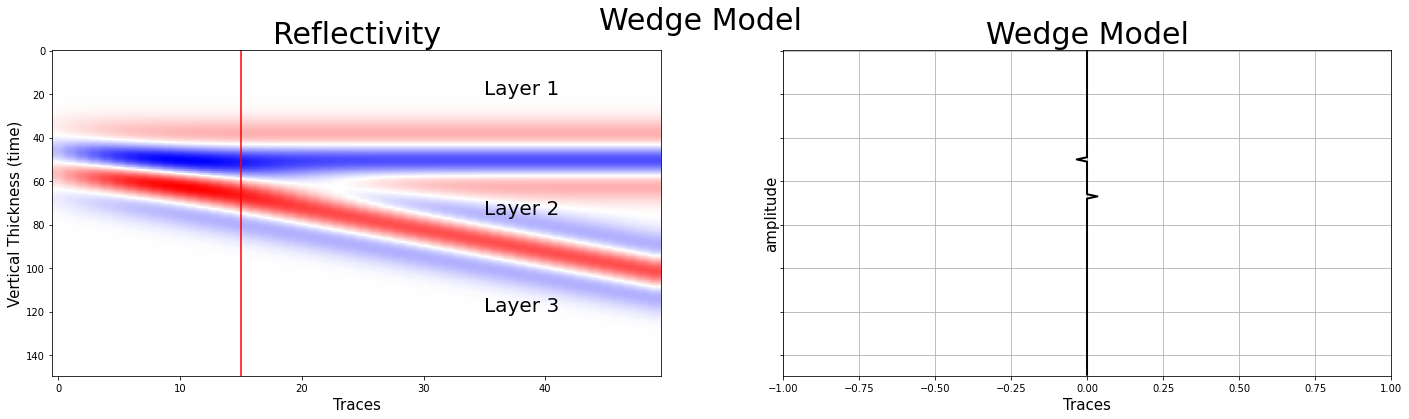

In [199]:
# extract a trace
trace_number=15
single_trace = reflc[:,trace_number]
y_trace = np.linspace(0, len(single_trace)-1, len(single_trace))


fig,ax=plt.subplots(1,2,figsize=(24,6), sharey=True)
plt.suptitle("Wedge Model",fontsize=30)

ax[0].imshow(traces, aspect="auto", cmap="bwr")
ax[0].axvline(x=15, c="r")
ax[0].set_title("Reflectivity",fontsize=30)
ax[0].set_ylabel("Vertical Thickness (time)", fontsize=15)
ax[0].set_xlabel("Traces",fontsize=15)
ax[0].text(35,20,"Layer 1", fontsize=20, color="black")
ax[0].text(35,75,"Layer 2", fontsize=20, color="black")
ax[0].text(35,120,"Layer 3", fontsize=20, color="black")


ax[1].plot(single_trace, y_trace, lw=2, color="black")
ax[1].set_title("Wedge Model",fontsize=30)
ax[1].set_xlabel("Traces",fontsize=15)
ax[1].set_ylabel("amplitude",fontsize=15)
ax[1].set_xlim(-1.0,1.0)
ax[1].grid()

Text(0, 0.5, 'Amplitdue')

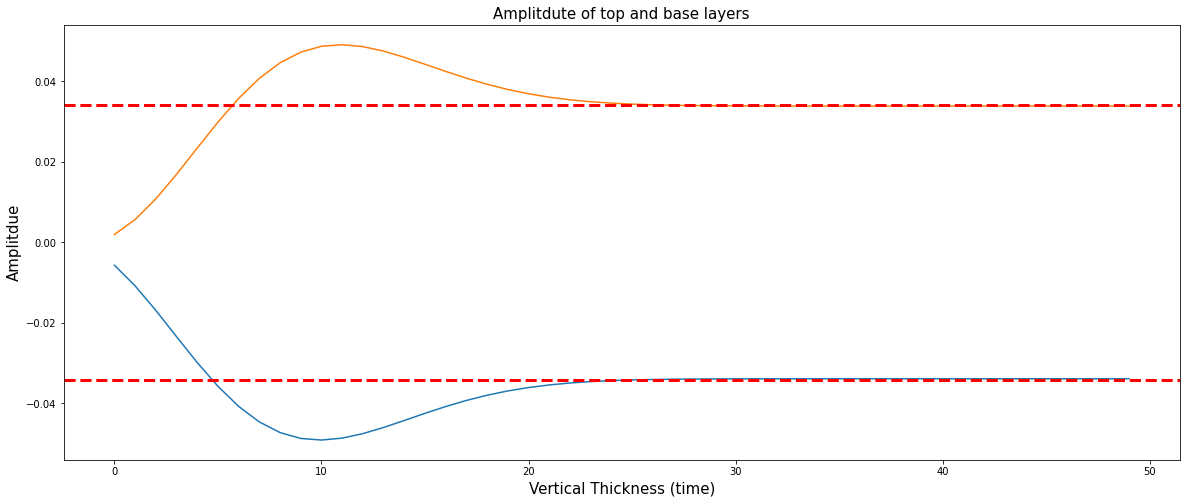

In [200]:
# extract amplitude of the seismic wedge model for the top and base layer of the wedge

Amplitude_top = traces[50,:]

Amplitude_base =[] 
ntraces=50
for i in range(ntraces):
    layer=traces[52+i,i]
    Amplitude_base.append(layer)
    
plt.figure(figsize=(20,8))
plt.plot(Amplitude_top)  # ampltidue of the top layer
plt.plot(np.linspace(0,ntraces-1,ntraces), Amplitude_base) # amplitude base layer
plt.axhline(y=reflectivity_layer_1_2, c="r", linestyle="--", linewidth=3)
plt.axhline(y=reflectivity_layer_2_3, c="r", linestyle="--", linewidth=3)
plt.title("Amplitdute of top and base layers", fontsize=15)
plt.xlabel("Vertical Thickness (time)", fontsize=15)
plt.ylabel("Amplitdue",fontsize=15)